In [132]:
# Imports needed in every section
import pandas as pd
import testing_scripts.constants as constants
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Section 1: Creating a labeled dataframe
This section involves reading in the resumes, filtering out entries whose CVs are too short, and creating positive and negative classes while filtering out all entries in neither class.

## From resumes parquet
This subsection assumes the existence of the resumes parquet file, processes, and exports the Labeled dataframe

In [316]:
# Read in the parquet
RESUMES_PARQUET_INPUT_FILENAME = "data/resumes.parquet"
raw_df = pd.read_parquet(RESUMES_PARQUET_INPUT_FILENAME, engine='pyarrow')  # raw dataframe

# Filter the dataframe by minimum cv length
MIN_CV_LENGTH = 1000
filtered_df = raw_df.loc[raw_df['CV'].dropna().apply(len) >= MIN_CV_LENGTH]

# Add a true label column based on the specified keywords
import testing_scripts.label_resumes
labeled_df = filtered_df.copy()
testing_scripts.label_resumes.add_true_label_column(labeled_df, constants.POSITIVE_POSITIONS, constants.POSITIVE_KEYWORDS, constants.NEGATIVE_POSITIONS, constants.NEGATIVE_KEYWORDS)

# Filter out entries whose true label is NA (i.e. belongs to neither class)
labeled_df = labeled_df[labeled_df["True Label"].notna()]

# Export the labeled dataframe
LABELED_DATAFRAME_OUTPUT_FILENAME = "data/labeled_df_PM vs UI_1000 chars min.csv"
labeled_df.to_csv(LABELED_DATAFRAME_OUTPUT_FILENAME)

## From import
If the labeled_df.csv file already exists, run this instead to import the file

In [317]:
LABELED_DATAFRAME_INPUT_FILENAME = "data/labeled_df_PM vs UI_1000 chars min.csv"
labeled_df = pd.read_csv(LABELED_DATAFRAME_INPUT_FILENAME)

## True label playground
This subsection contains some light code for examining the true label

In [318]:
# The size of the positive and negative classes
value_counts = labeled_df["True Label"].value_counts()
print(value_counts)

positiveClassSize = value_counts.get(constants.POSITIVE_LABEL, default=0)
negativeClassSize = value_counts.get(constants.NEGATIVE_LABEL, default=0)
print(f"Proportion of positives = {positiveClassSize / (positiveClassSize + negativeClassSize)}")

True Label
1    5232
0    3596
Name: count, dtype: int64
Proportion of positives = 0.5926597190756683


In [313]:
# Example positive entry
example_positive_entry = labeled_df.loc[labeled_df["True Label"] == constants.POSITIVE_LABEL].iloc[0]
example_positive_cv: str = example_positive_entry.to_dict()["CV"]
print(f"Truncated positive CV:\n====================\n {example_positive_cv[:1000]}...")

Truncated positive CV:
 During my work in a role of a Client Success Manager, I was responsible for the large US-based accounts health and growth. I used to work on 3 - 4 large enterprise-level accounts in parallel with the total number of dedicated engineering teams 30 – 50 people.
I've generated a lot of ideas for improvements, participated in building up strong engineering teams and working out the processes and strategy for the clients, which have resulted in the account and team growth.
I had a chance to mentor and inspire many people, who have later become talented engineers and solution architects, and learn from them as well.
- Managing multiple accounts with different engagement models. 
- Managing all aspects of client relationships. 
- Analyzing client's business pain-points, assisting with the roadmap to help reaching out strategic goals. 
- Taking active part in the whole opportunity initiation process. Drafting Proposals and SOWs.
- Extending partnership with the existing

In [327]:
# Example negative entry 
example_negative_entry = labeled_df.loc[labeled_df["True Label"] == constants.NEGATIVE_LABEL].iloc[0]
example_negative_cv = example_negative_entry.to_dict()["CV"]
print(f"Truncated negative CV:\n====================\n {example_negative_cv[:1000]}")

Truncated negative CV:
 
•   Possession of Adobe Photoshop, Adobe-AI, skills of working with a graphic tablet;
•   UI/UX ;
•.  Figma, Zeplin, Sketch, MarvelApp, Invision;
•   2D graphics (understanding of pixel and vector graphics and their specifics);
•.  2D Design;
•.  3D Max;
•   Ability to work in different styles;
•   Ability to draw by hand;
•   Creation of design banners, layouts, logos, frameworks and prototypes for websites and mobile applications;
•   Testing of games;
•   Making presentations in Power Point;
Availability of portfolio;
Bug tracking systems and project management tools: Trello and Jira.
I'm self-motivated artist with a strong skills at game industry. I have more 5 years experience in game company, and now, I want to broaden my world with interesting projects, to share own experience and to acquire new skills and knowledge.
So, my goal is putting into practice somebody's dreams, in so doing, working with pleasure.
I would like to work at company with friendly t

In [329]:
example_negative_cv

"\n•   Possession of Adobe Photoshop, Adobe-AI, skills of working with a graphic tablet;\r\n•   UI/UX ;\r\n•.  Figma, Zeplin, Sketch, MarvelApp, Invision;\r\n•   2D graphics (understanding of pixel and vector graphics and their specifics);\r\n•.  2D Design;\r\n•.  3D Max;\r\n•   Ability to work in different styles;\r\n•   Ability to draw by hand;\r\n•   Creation of design banners, layouts, logos, frameworks and prototypes for websites and mobile applications;\r\n•   Testing of games;\r\n•   Making presentations in Power Point;\r\nAvailability of portfolio;\r\nBug tracking systems and project management tools: Trello and Jira.\nI'm self-motivated artist with a strong skills at game industry. I have more 5 years experience in game company, and now, I want to broaden my world with interesting projects, to share own experience and to acquire new skills and knowledge.\r\nSo, my goal is putting into practice somebody's dreams, in so doing, working with pleasure.\r\nI would like to work at co

In [40]:
# Look at negative labeled entries
# labeled_df.loc[labeled_df["True Label"] == constants.NEGATIVE_LABEL]

# Section 2: Marking samples for Experiments
This section involves marking samples in the labeled dataframe for experiments. This allows us to experiment on a few samples at a time, rather than all entries at once.

## From labeled_df
This subsection assumes the existence of the labeled_df object within this notebook, processes, and exports the Marked dataframe

In [331]:
# How many samples from each class we want to mark for experiments
NUM_POSITIVE_SAMPLES = 100
NUM_NEGATIVE_SAMPLES = 100

# Create a new column "Marked for Experiments" and deterministically mark 
# the first NUM_POSITIVE_SAMPLES positive entries and the first NUM_NEGATIVE_SAMPLES negative entries True and all others false
marked_df = labeled_df.copy()
marked_df["Marked for Experiments"] = False
positive_sample_indices = marked_df[marked_df["True Label"] == constants.POSITIVE_LABEL].index[:NUM_POSITIVE_SAMPLES]
negative_sample_indices = marked_df[marked_df["True Label"] == constants.NEGATIVE_LABEL].index[:NUM_NEGATIVE_SAMPLES]
marked_df.loc[positive_sample_indices, "Marked for Experiments"] = True
marked_df.loc[negative_sample_indices, "Marked for Experiments"] = True

# Export the marked dataframe
MARKED_DATAFRAME_OUTPUT_FILENAME = "data/marked_df_100 PM vs 100 UI_1000 chars min.csv"
marked_df.to_csv(MARKED_DATAFRAME_OUTPUT_FILENAME)

## From import
If the marked_df.csv file already exists, run this instead to import the file

In [2]:
MARKED_DATAFRAME_INPUT_FILENAME = "data/marked_df_100 PM vs 100 UI_1000 chars min.csv"
marked_df = pd.read_csv(MARKED_DATAFRAME_INPUT_FILENAME)

## Mark playground
This subsection contains some light code for examining the true label

In [332]:
# The total number of marked entries (should match NUM_POSITIVE_SAMPLES + NUM_NEGATIVE_SAMPLES)
value_counts = marked_df["Marked for Experiments"].value_counts()
print(f"Number of samples = {value_counts.get(True)}")

Number of samples = 200


# Section 3: Generating tailored resumes
This section involves generating resumes tailored toward a specific job over the samples marked for experiments

## From marked_df
This subsection assumes the existence of the marked_df object within this notebook and generates modified resumes tailored toward the job specified in constants.py

In [333]:
# Add tailored resumes based on the job description using the chosen model
import testing_scripts.generate_resumes as generate_resumes
tailored_df = marked_df.copy()
generate_resumes.create_modified_resumes(tailored_df, job_name = constants.JOB_NAME, job_description = constants.JOB_DESCRIPTION, model_name = constants.MODEL_NAME, verbose = True)

# Export the tailored dataframe
TAILORED_DATAFRAME_OUTPUT_FILENAME = "data/tailored_df_100 PM vs 100 UI_1000 chars min_GPT-4o-mini general.csv"
tailored_df.to_csv(TAILORED_DATAFRAME_OUTPUT_FILENAME)

Number of samples marked for experiments = 200
Generating a new tailored resume (1 generated so far)...
Generating a new tailored resume (2 generated so far)...
Generating a new tailored resume (3 generated so far)...
Generating a new tailored resume (4 generated so far)...
Generating a new tailored resume (5 generated so far)...
Generating a new tailored resume (6 generated so far)...
Generating a new tailored resume (7 generated so far)...
Generating a new tailored resume (8 generated so far)...
Generating a new tailored resume (9 generated so far)...
Generating a new tailored resume (10 generated so far)...
Generating a new tailored resume (11 generated so far)...
Generating a new tailored resume (12 generated so far)...
Generating a new tailored resume (13 generated so far)...
Generating a new tailored resume (14 generated so far)...
Generating a new tailored resume (15 generated so far)...
Generating a new tailored resume (16 generated so far)...
Generating a new tailored resume (

## From import
If the tailored_df.csv file already exists, run this instead to import the file

In [22]:
TAILORED_DATAFRAME_INPUT_FILENAME = "data/tailored_df_100 PM vs 100 UI_1000 chars min_GPT-4o-mini general.csv"
tailored_df = pd.read_csv(TAILORED_DATAFRAME_INPUT_FILENAME)

## Tailored resumes playground
This subsection contains some light code for examining the tailored resumes

In [343]:
example_positive_entry = tailored_df[tailored_df["Marked for Experiments"] & tailored_df["True Label"] == constants.POSITIVE_LABEL].iloc[0]
example_positive_CV = example_positive_entry["CV"]
example_positive_tailored_CV = example_positive_entry[constants.TAILORED_CV_NAME]

print(f"Truncated positive CV:\n====================\n {example_positive_CV[:750]}...")
print(f"\n\nTruncated positive tailored CV:\n====================\n {example_positive_tailored_CV[:750]}...")
# print(f"Example positive CV = {example_positive_cv}\n\n")

# example_tailored_positive_cv = generate_resumes.tailor_resume(example_positive_cv, job_description = constants.JOB_DESCRIPTION, model_name = constants.MODEL_NAME)
# print(f"Example positive tailored CV = {example_tailored_positive_cv}")

Truncated positive CV:
 During my work in a role of a Client Success Manager, I was responsible for the large US-based accounts health and growth. I used to work on 3 - 4 large enterprise-level accounts in parallel with the total number of dedicated engineering teams 30 – 50 people.
I've generated a lot of ideas for improvements, participated in building up strong engineering teams and working out the processes and strategy for the clients, which have resulted in the account and team growth.
I had a chance to mentor and inspire many people, who have later become talented engineers and solution architects, and learn from them as well.
- Managing multiple accounts with different engagement models. 
- Managing all aspects of client relationships. 
- Analyzing cli...


Truncated positive tailored CV:
 **[Your Name]**  
[Your Address]  
[City, State, Zip]  
[Your Email]  
[Your Phone Number]  
[LinkedIn Profile]  

---

**PROFESSIONAL SUMMARY**  
Results-driven Project Manager with a strong

In [344]:
example_negative_entry = tailored_df[tailored_df["Marked for Experiments"] & tailored_df["True Label"] == constants.NEGATIVE_LABEL].iloc[0]
example_negativeCV = example_negative_entry["CV"]
example_negative_tailored_CV = example_negative_entry[constants.tailored_CV_name(model_name = constants.MODEL_NAME, job_name = constants.JOB_NAME)]

print(f"Truncated negative CV:\n====================\n {example_negativeCV[:750]}...")
print(f"\n\nTruncated negative tailored CV:\n====================\n {example_negative_tailored_CV[:750]}...")
# print(f"Example positive CV = {example_positive_cv}\n\n")

# example_tailored_positive_cv = generate_resumes.tailor_resume(example_positive_cv, job_description = constants.JOB_DESCRIPTION, model_name = constants.MODEL_NAME)
# print(f"Example positive tailored CV = {example_tailored_positive_cv}")

Truncated negative CV:
 
•   Possession of Adobe Photoshop, Adobe-AI, skills of working with a graphic tablet;
•   UI/UX ;
•.  Figma, Zeplin, Sketch, MarvelApp, Invision;
•   2D graphics (understanding of pixel and vector graphics and their specifics);
•.  2D Design;
•.  3D Max;
•   Ability to work in different styles;
•   Ability to draw by hand;
•   Creation of design banners, layouts, logos, frameworks and prototypes for websites and mobile applications;
•   Testing of games;
•   Making presentations in Power Point;
Availability of portfolio;
Bug tracking systems and project management tools: Trello and Jira.
I'm self-motivated artist with a strong skills at game industry. I have more 5 years experience in game company, and now, I want to broaden my...


Truncated negative tailored CV:
 **[Your Name]**  
[Your Address]  
[City, State, Zip]  
[Your Email]  
[Your Phone Number]  
[LinkedIn Profile / Portfolio URL]  

---

**PROFESSIONAL SUMMARY**  
Self-motivated project manager and a

# Section 4: Scoring resumes
This section involves scoring the original and generated CVs

## From tailored_df
This subsection assumes the existence of the tailored_df object within this notebook and computes for both the original and generated CVs

In [352]:
# Add scores for both the original and generated CVs
import testing_scripts.score_resumes as score_resumes
# scored_df = tailored_df.copy()
# scored_df = marked_df.copy()

score_resumes.append_scores(scored_df, job_description = constants.JOB_DESCRIPTION, CV_column_name = "CV", verbose = True)
# score_resumes.append_scores(scored_df, job_description = constants.JOB_DESCRIPTION, CV_column_name = constants.TAILORED_CV_NAME, verbose = True)

# Export the scored dataframe
SCORED_DATAFRAME_OUTPUT_FILENAME = "data/scored_df_100 PM vs 100 UI_1000 chars min_GPT-4o-mini general.csv"
scored_df.to_csv(SCORED_DATAFRAME_OUTPUT_FILENAME)

Number of samples marked for experiments = 200
Scoring a new resume (300 scored so far)...
Scoring a new resume (301 scored so far)...
Scoring a new resume (302 scored so far)...
Scoring a new resume (303 scored so far)...
Scoring a new resume (304 scored so far)...
Scoring a new resume (305 scored so far)...
Scoring a new resume (306 scored so far)...
Scoring a new resume (307 scored so far)...
Scoring a new resume (308 scored so far)...
Scoring a new resume (309 scored so far)...
Scoring a new resume (310 scored so far)...
Scoring a new resume (311 scored so far)...
Scoring a new resume (312 scored so far)...
Scoring a new resume (313 scored so far)...
Scoring a new resume (314 scored so far)...
Scoring a new resume (315 scored so far)...
Scoring a new resume (316 scored so far)...
Scoring a new resume (317 scored so far)...
Scoring a new resume (318 scored so far)...
Scoring a new resume (319 scored so far)...
Scoring a new resume (320 scored so far)...
Scoring a new resume (321 sco

## From import
If the scored_df.csv file already exists, run this instead to import the file

In [272]:
SCORED_DATAFRAME_INPUT_FILENAME = "data/scored_df_100 PM vs 100 UI_1000 chars min_GPT-4o-mini general.csv"
scored_df = pd.read_csv(SCORED_DATAFRAME_INPUT_FILENAME)

## Scored resumes playground
This subsection contains some light code for examining the resume scores

In [370]:
# Extract original CV score series
# original_cv_scores: pd.Series = scored_df.loc[scored_df["CV Score"].notna(),"CV Score"]

original_positive_cv_scores: pd.Series = scored_df.loc[scored_df["Marked for Experiments"] & (scored_df["True Label"] == constants.POSITIVE_LABEL), "CV Score"]
original_negative_cv_scores: pd.Series = scored_df.loc[scored_df["Marked for Experiments"] & (scored_df["True Label"] == constants.NEGATIVE_LABEL), "CV Score"]

ORIGINAL_POSITIVE_CV_SCORES_OUTPUT_FILENAME = "data/100 original PM CV scores_1000 chars min_GPT-4o-mini general.csv"
ORIGINAL_NEGATIVE_CV_SCORES_OUTPUT_FILENAME = "data/100 original UI CV scores_1000 chars min_GPT-4o-mini general.csv"

original_positive_cv_scores.to_csv(ORIGINAL_POSITIVE_CV_SCORES_OUTPUT_FILENAME)
original_negative_cv_scores.to_csv(ORIGINAL_NEGATIVE_CV_SCORES_OUTPUT_FILENAME)

# Extract tailored CV score series
tailored_positive_cv_scores: pd.Series = scored_df.loc[scored_df["Marked for Experiments"] & (scored_df["True Label"] == constants.POSITIVE_LABEL), f"{constants.TAILORED_CV_NAME} Score"]
tailored_negative_cv_scores: pd.Series = scored_df.loc[scored_df["Marked for Experiments"] & (scored_df["True Label"] == constants.NEGATIVE_LABEL), f"{constants.TAILORED_CV_NAME} Score"]

TAILORED_POSITIVE_CV_SCORES_OUTPUT_FILENAME = "data/100 tailored PM CV scores_1000 chars min_GPT-4o-mini general.csv"
TAILORED_NEGATIVE_CV_SCORES_OUTPUT_FILENAME = "data/100 tailored UI CV scores_1000 chars min_GPT-4o-mini general.csv"

tailored_positive_cv_scores.to_csv(TAILORED_POSITIVE_CV_SCORES_OUTPUT_FILENAME)
tailored_negative_cv_scores.to_csv(TAILORED_NEGATIVE_CV_SCORES_OUTPUT_FILENAME)

In [371]:
# Import each type
ORIGINAL_POSITIVE_SCORES_INPUT_FILENAME = "data/100 original PM CV scores_1000 chars min_GPT-4o-mini general.csv"
ORIGINAL_NEGATIVE_SCORES_INPUT_FILENAME = "data/100 original UI CV scores_1000 chars min_GPT-4o-mini general.csv"

original_positive_cv_scores: np.ndarray = pd.read_csv(ORIGINAL_POSITIVE_SCORES_INPUT_FILENAME)["CV Score"].values
original_negative_cv_scores: np.ndarray = pd.read_csv(ORIGINAL_NEGATIVE_SCORES_INPUT_FILENAME)["CV Score"].values

TAILORED_POSITIVE_SCORES_INPUT_FILENAME = "data/100 tailored PM CV scores_1000 chars min_GPT-4o-mini general.csv"
TAILORED_NEGATIVE_SCORES_INPUT_FILENAME = "data/100 tailored UI CV scores_1000 chars min_GPT-4o-mini general.csv"

tailored_positive_cv_scores: np.ndarray = pd.read_csv(TAILORED_POSITIVE_SCORES_INPUT_FILENAME)[f"{constants.TAILORED_CV_NAME} Score"].values
tailored_negative_cv_scores: np.ndarray = pd.read_csv(TAILORED_NEGATIVE_SCORES_INPUT_FILENAME)[f"{constants.TAILORED_CV_NAME} Score"].values

In [376]:
# positive_cv_scores = original_positive_cv_scores
# negative_cv_scores = original_negative_cv_scores
# positive_name: str = "Original PM"          # change me
# negative_name: str = "Original UI"          # change me

positive_cv_scores = tailored_positive_cv_scores
negative_cv_scores = tailored_negative_cv_scores
positive_name: str = "Tailored PM"          # change me
negative_name: str = "Tailored UI"          # change me

'''
Collect key statistics
'''
num_positive_scores = positive_cv_scores.size
num_negative_scores = negative_cv_scores.size
positive_proportion = num_positive_scores / (num_positive_scores + num_negative_scores)
negative_proportion = 1 - positive_proportion

positive_mean = positive_cv_scores.mean()
positive_std = positive_cv_scores.std()
negative_mean = negative_cv_scores.mean()
negative_std = negative_cv_scores.std()

from sklearn.metrics import roc_curve, auc
y_true = np.concatenate((np.ones(num_positive_scores), np.zeros(num_negative_scores)))
y_score = np.concatenate((positive_cv_scores, negative_cv_scores))
FPRs, TPRs, thresholds = roc_curve(y_true, y_score, drop_intermediate=False) 
roc_auc = auc(FPRs, TPRs)

accuracies = positive_proportion * TPRs + negative_proportion * (1 - FPRs)
optimal_index = np.argmax(accuracies)
optimal_accuracy = accuracies[optimal_index]
optimal_threshold = thresholds[optimal_index]
optimal_TPR = TPRs[optimal_index]
optimal_TNR = 1 - FPRs[optimal_index]

conservatively_optimal_index = np.argmax(np.where(FPRs == 0, TPRs, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
conservatively_optimal_TPR = TPRs[conservatively_optimal_index]
conservatively_optimal_threshold = thresholds[conservatively_optimal_index]


Tailored PM score mean = 88.362, std = 1.657
Tailored UI score mean = 85.210, std = 1.643
Optimal accuracy = 0.8400000000000001
	Optimal threshold = 87.007
	Optimal TPR = 0.79
	Optimal TNR = 0.89
Conservatively optimal TPR = 0.37
	Conservatively optimal threshold = 89.027
AUC = 0.910


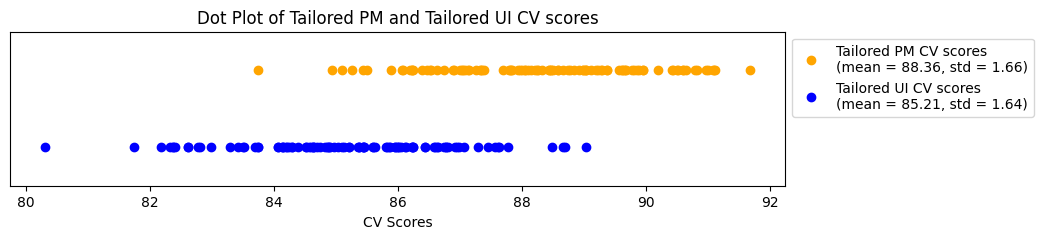

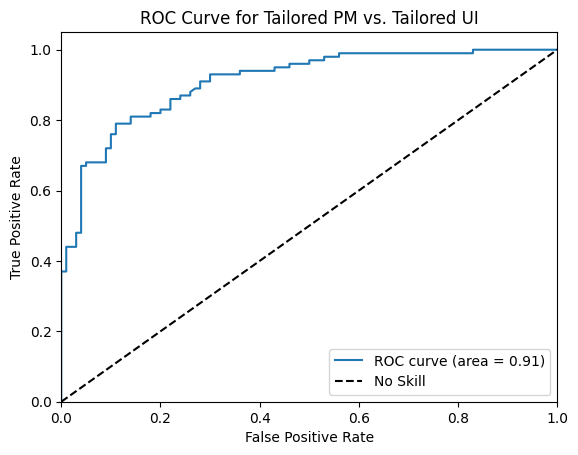

Saved to data/figures/100 tailored PM vs 100 tailored UI CV scores_1000 chars min_GPT-4o-mini general.csv.png
Saved to data/figures/100 tailored PM vs 100 tailored UI CV ROC curve_1000 chars min_GPT-4o-mini general.csv.png


In [377]:
'''
Print report
'''
save_to_file: bool = True                   # change me


uppercase_first = lambda string : string[0].upper() + string[1:]    # capitalizes first letter
lowercase_first = lambda string : string[0].lower() + string[1:]    # uncapitalizes first letter

# Print statistics
print(f"{positive_name} score mean = {positive_mean:.3f}, std = {positive_std:.3f}")
print(f"{negative_name} score mean = {negative_mean:.3f}, std = {negative_std:.3f}")

print(f"Optimal accuracy = {optimal_accuracy}\n\tOptimal threshold = {optimal_threshold}\n\tOptimal TPR = {optimal_TPR}\n\tOptimal TNR = {optimal_TNR}")
print(f"Conservatively optimal TPR = {conservatively_optimal_TPR}\n\tConservatively optimal threshold = {conservatively_optimal_threshold}")
print(f"AUC = {roc_auc:.3f}")


# Plot the distributions as a dot plot
distribution_figure, distribution_ax = plt.subplots(figsize=(10, 2))  # Create a figure and axis

positive_distribution_plot_label: str = f"{uppercase_first(positive_name)} CV scores\n(mean = {positive_mean:.2f}, std = {positive_std:.2f})"
negative_distribution_plot_label: str = f"{uppercase_first(negative_name)} CV scores\n(mean = {negative_mean:.2f}, std = {negative_std:.2f})"
distribution_ax.plot(positive_cv_scores, np.ones_like(positive_cv_scores), 'o', color='orange', label = positive_distribution_plot_label)  # Plot the positive scores
distribution_ax.plot(negative_cv_scores, np.zeros_like(negative_cv_scores), 'o', color='blue', label = negative_distribution_plot_label)   # Plot the negative scores

distribution_ax.set_ylim([-0.5, 1.5])
distribution_ax.set_yticks([])                                                                                                                           # Set y-ticks to be hidden to make it look like a 1-dimensional plot
distribution_ax.set_xlabel('CV Scores')
distribution_ax.set_title(f'Dot Plot of {uppercase_first(positive_name)} and {uppercase_first(negative_name)} CV scores')
distribution_ax.legend(bbox_to_anchor=(1, 1), loc='upper left')                             # Move legend outside plot
# distribution_figure.show()        # causes strange error
plt.show()


# Plot the ROC curve
ROC_figure, ROC_ax = plt.subplots()

ROC_ax .plot(FPRs, TPRs, label='ROC curve (area = %0.2f)' % roc_auc)
ROC_ax .plot([0, 1], [0, 1], 'k--', label='No Skill')
ROC_ax.set_xlim([0.0, 1.0])
ROC_ax.set_ylim([0.0, 1.05])
ROC_ax.set_xlabel('False Positive Rate')
ROC_ax.set_ylabel('True Positive Rate')
ROC_ax.set_title(f'ROC Curve for {uppercase_first(positive_name)} vs. {uppercase_first(negative_name)}')
ROC_ax.legend()
plt.show()

# Export the plots
if save_to_file:
    distribution_plot_filename  = f"data/figures/{num_positive_scores} {lowercase_first(positive_name)} vs {num_negative_scores} {lowercase_first(negative_name)} CV scores_1000 chars min_GPT-4o-mini general.csv.png"
    ROC_plot_filename           = f"data/figures/{num_positive_scores} {lowercase_first(positive_name)} vs {num_negative_scores} {lowercase_first(negative_name)} CV ROC curve_1000 chars min_GPT-4o-mini general.csv.png"

    distribution_figure.savefig(distribution_plot_filename, bbox_inches='tight')    # prevent from cropping off
    ROC_figure.savefig(ROC_plot_filename, bbox_inches='tight')                      # prevent from cropping off

    print(f"Saved to {distribution_plot_filename}")
    print(f"Saved to {ROC_plot_filename}")

In [269]:
# Find the threshold that maximizes TPR subject to FPR <= 0.2
semiconservatively_optimal_index = np.argmax(np.where(FPRs <= 0.2, TPRs, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
semiconservatively_optimal_TPR = TPRs[semiconservatively_optimal_index]
semiconservatively_optimal_threshold = thresholds[semiconservatively_optimal_index]


In [279]:
semiconservatively_optimal_TPR 

0.49

In [271]:
semiconservatively_optimal_threshold

90.603

In [294]:
scored_df.loc[scored_df[f"{constants.TAILORED_CV_NAME} Score"] >= semiconservatively_optimal_threshold, f"CV"].iloc[10]

"\nI worked on the creation and implementation of ideas for branding tenders. I deveoped logos and outdoor advertising, actively worked with UNICEF projects. Also created presentations.I worked with the design of social media and together with the team we developed and designed ideas for outdoor advertising and social projects. Worked on design for the DARNITSA company's social media and its internal projects. I also led the social advertising project for Nova Poshta. Participated in creation of visual design of websites \r\nfor customers. Continued to work with UNICEF. Was making landing pages on Tilda and in Figma.\n"

In [386]:
# Compute the rate of improvement
tailored_negative_cv_scores > original_negative_cv_scores

[85.019 85.86  85.258 85.191 80.716 88.986 88.174 87.421 87.48  82.948
 82.95  86.7   81.252 79.948 83.163 85.802 85.78  87.567 84.017 85.041
 86.276 88.236 87.166 88.869 85.653 86.735 83.36  85.094 82.957 86.642
 84.382 83.709 88.748 83.627 86.529 88.783 84.996 86.963 84.085 78.62
 80.576 80.938 81.939 83.849 86.885 88.398 83.143 80.91  87.553 86.729
 79.521 88.263 85.722 80.547 81.972 84.452 87.35  85.361 86.681 83.839
 84.7   83.452 84.739 87.49  84.304 84.822 84.889 83.661 80.976 83.479
 84.817 80.684 84.8   83.725 86.251 84.455 82.658 85.338 84.794 86.22
 86.516 84.571 87.029 88.988 86.619 84.711 81.996 83.662 87.372 82.12
 84.539 83.914 83.275 82.212 80.48  83.091 84.527 81.432 85.947 82.644]
[84.723 76.719 77.253 78.801 82.66  79.292 76.74  83.928 80.487 79.881
 83.368 84.158 80.552 81.784 81.198 80.614 77.925 80.315 80.926 77.916
 78.835 80.383 80.544 82.678 79.095 76.556 79.146 80.512 79.188 78.836
 78.542 78.768 80.818 77.171 76.636 79.858 81.624 79.969 79.64  79.679
 78.789 